In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')


In [ ]:
df.sample(6)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4914,ham,We took hooch for a walk toaday and i fell ove...,NaN,NaN,NaN
3766,ham,"Sir Goodmorning, Once free call me.",NaN,NaN,NaN
713,ham,Save yourself the stress. If the person has a ...,NaN,NaN,NaN
4113,ham,Where are you ? What do you do ? How can you s...,NaN,NaN,NaN
2535,ham,Can you pls pls send me a mail on all you know...,NaN,NaN,NaN
1556,ham,Good sleep is about rhythm. The person has to ...,NaN,NaN,NaN


In [ ]:
df.shape
#steps-> cleaning ,eda , text preprocessing ,model building,evaluation , improvements , converting into wesite , deploy

(5572, 5)

**1.DATA CLEANING**

In [ ]:
df.info()
## most values are missing in unnamed 2,3,4 -> they are useless practically ->drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2' ,'Unnamed: 3', 'Unnamed: 4' ] , inplace= True)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3081,ham,"And very importantly, all we discuss is betwee..."
1020,ham,Good afternoon on this glorious anniversary da...
1653,ham,I was at bugis juz now wat... But now i'm walk...
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
186,ham,"Haha awesome, be there in a minute"


In [ ]:
# label encoding ham spam (0,1)
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
#checking missing values
df.isnull().sum()
#no missing values found


target    0
text      0
dtype: int64

In [ ]:
#checking duplicate values
df.duplicated().sum()
#403 duplicate values ->remove them

403

In [ ]:
#removing duplicate values
df = df.drop_duplicates(keep='first')  # keep first ensures that only one vale of them is maintained
df.duplicated().sum()
#now we have 0 duplaice values

0

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

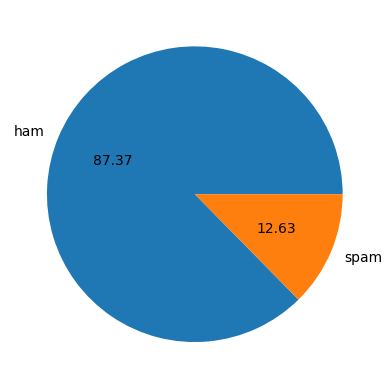

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['ham','spam'] ,autopct="%0.2f")
plt.show()
# 87 percent not spam and 12 percent spam ->data is imbalanced

In [ ]:
# we will now make 3 more columns -> no characters in message , no ->words etc
# => we wil have to import another library nltk -> natural language toolkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['text'].apply(len)   #gives number of characters =>apply is pandas function

In [ ]:
#now number of words
df['text'].apply(lambda x : nltk.word_tokenize(x)) # gives a list of each messages as words
# => to get word simply use len funtion
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
# now adding number of sentences->using nltk only use sent_tokenize
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
# if we used sent tokenize directly without len -> it returns sentences of each row in form of list => one sentence is one i# now adding number of sentences->using nltk only use sent_tokenize
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
# if we used sent tokenize directly without len -> it returns sentences of each row in form of list

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# using the describe function to describe ham and spam separately
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#general observation being spam message has more words , more characters and sentences

In [ ]:
#representing in histplot
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

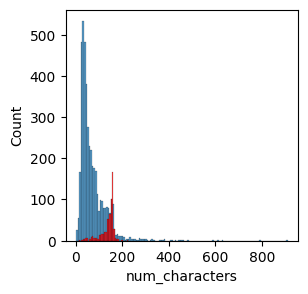

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

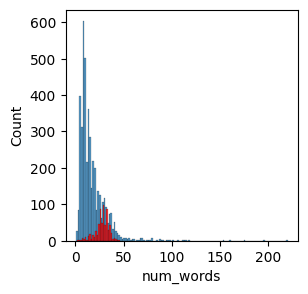

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

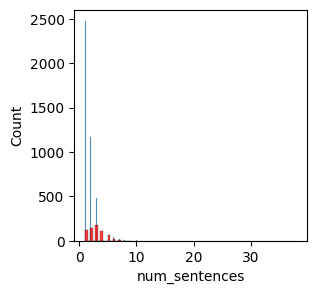

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

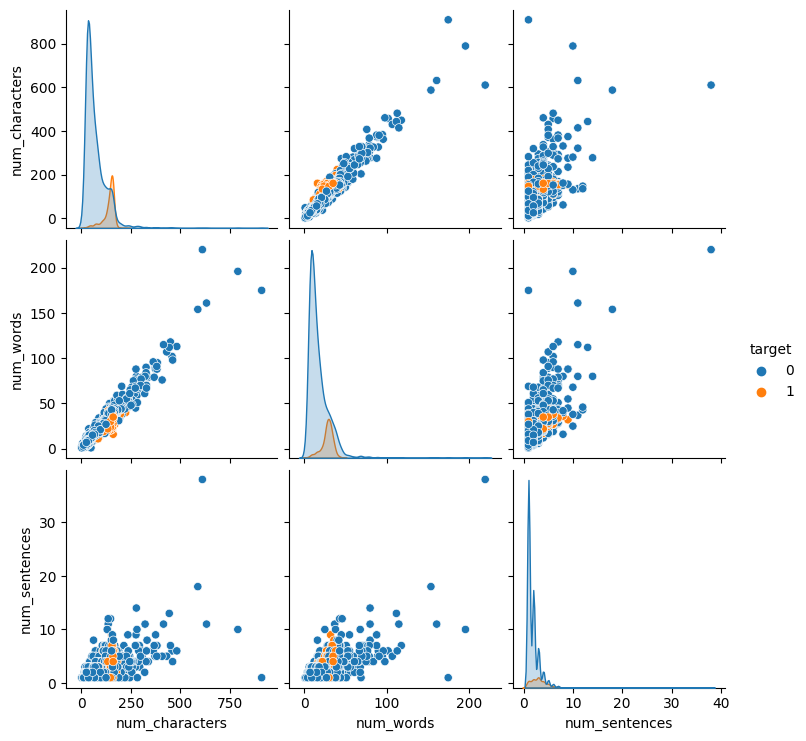

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
# getting correlation coefficients
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [ ]:
#here we can see that num_characters has the highest correlation coefficient

**DATA PREPROCESSING**

Covert all the letters to lower case
-tokenize
-remove special characters
-Removing stop words and punctuation - stemming

In [ ]:
# stop words examples is ,was ,the etc;
#tokenization means conversion into breaking sentences into words
# stemming -> groups similar type of words (dancing dance danced)->dance
# we create a function

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
print(ps.stem('loving') , ps.stem('dancing'))

love danc


In [ ]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():   #i> isalnum sees if the character is alphanumeric
            y.append(i)
    text = y[:]
    y.clear()    #->we did this beacus string are immutable . so the get exact copy use this slicing method
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)   #-> to return as a string

In [ ]:
transform_text('hEllo my Name %& is chaitanya , i iam loving machine learning , how about you?')

'hello name chaitanya iam love machin learn'

In [ ]:
#creating a new column for transformed text
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# generating word cloud for ham ans spam
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

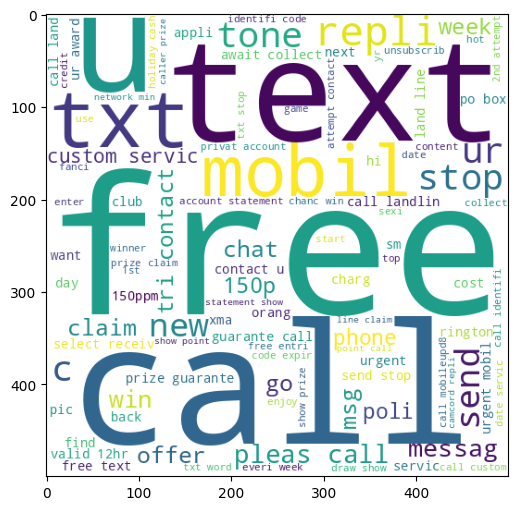

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

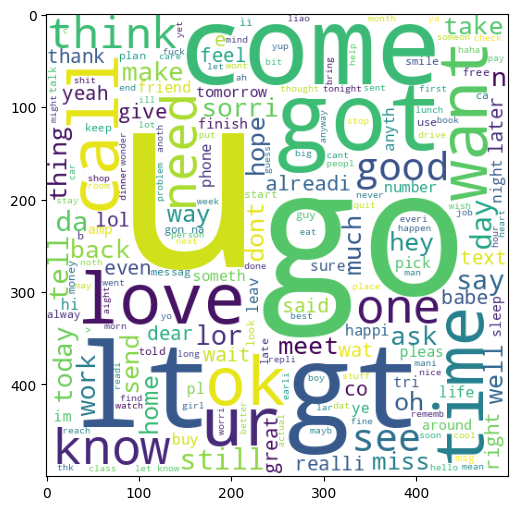

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word  in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter
len(spam_corpus)

9939

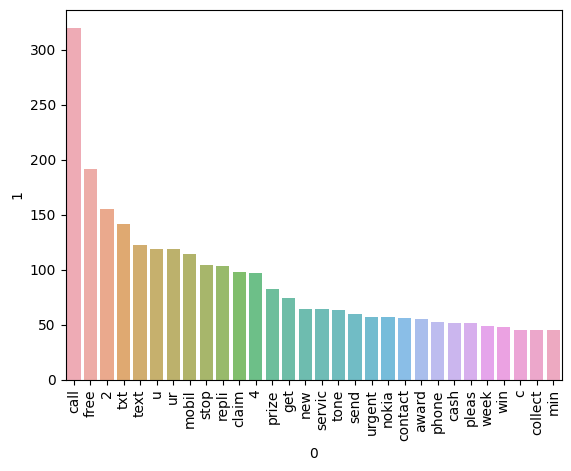

In [ ]:
# we can further analyze the data by finding out the most common words in spam and ham messages


sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha = 0.8)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#similary top thirty can be found out for ham classifier also

**Model Building**

we consider naive bayes method becouse there is a general consensus that naives bayes is good for textual data we will also check other algorithms but for now consider the naive bayes to be the base

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**In model building we saw that ,**


->initially we used bag of words i.e count vectorizer
->upon using tfidf vectoriser we got better accuracy and perfect precision
-> here , precision is a better parameter than accuracy because precision shows number of true positives i.e correctly classified as spam
-> this is beacuse the data we use is imbalanced (less spam and more ham)
-> we also tried scaling , using voting classifier(uses 3 best classifiers of our choice in combination) , also tried using stacking(same as vpting but we can assign algorithms based on precidence) , but the best result was still given my MNB with tfidf vectorizations
we can conclude by saying that MNB is better for our project



In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))